# Financial Fraud Detection Model

In [1]:
# Install opendatasets library
!pip install opendatasets

In [2]:
# Download DataSet from Kaggle
import opendatasets as od
path = "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"
od.download(path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: siddeshparkar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 103MB/s]


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Data
df = pd.read_csv("creditcardfraud/creditcard.csv")
print(df.isnull().sum())

# Separate Train & Test
X = df.drop(columns=["Class"])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

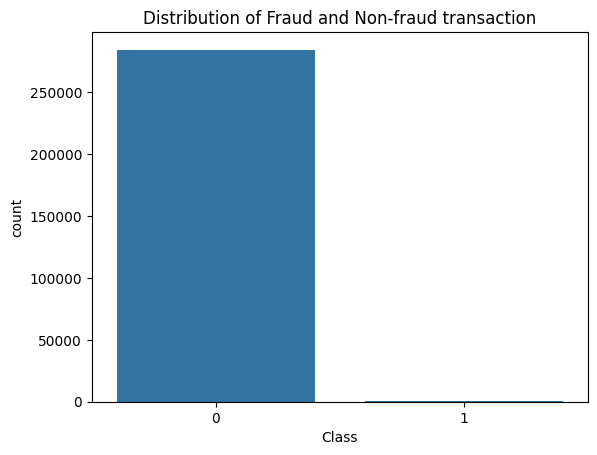

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraud and Non-fraud transaction')
plt.show()

fraud_percentage = df['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)

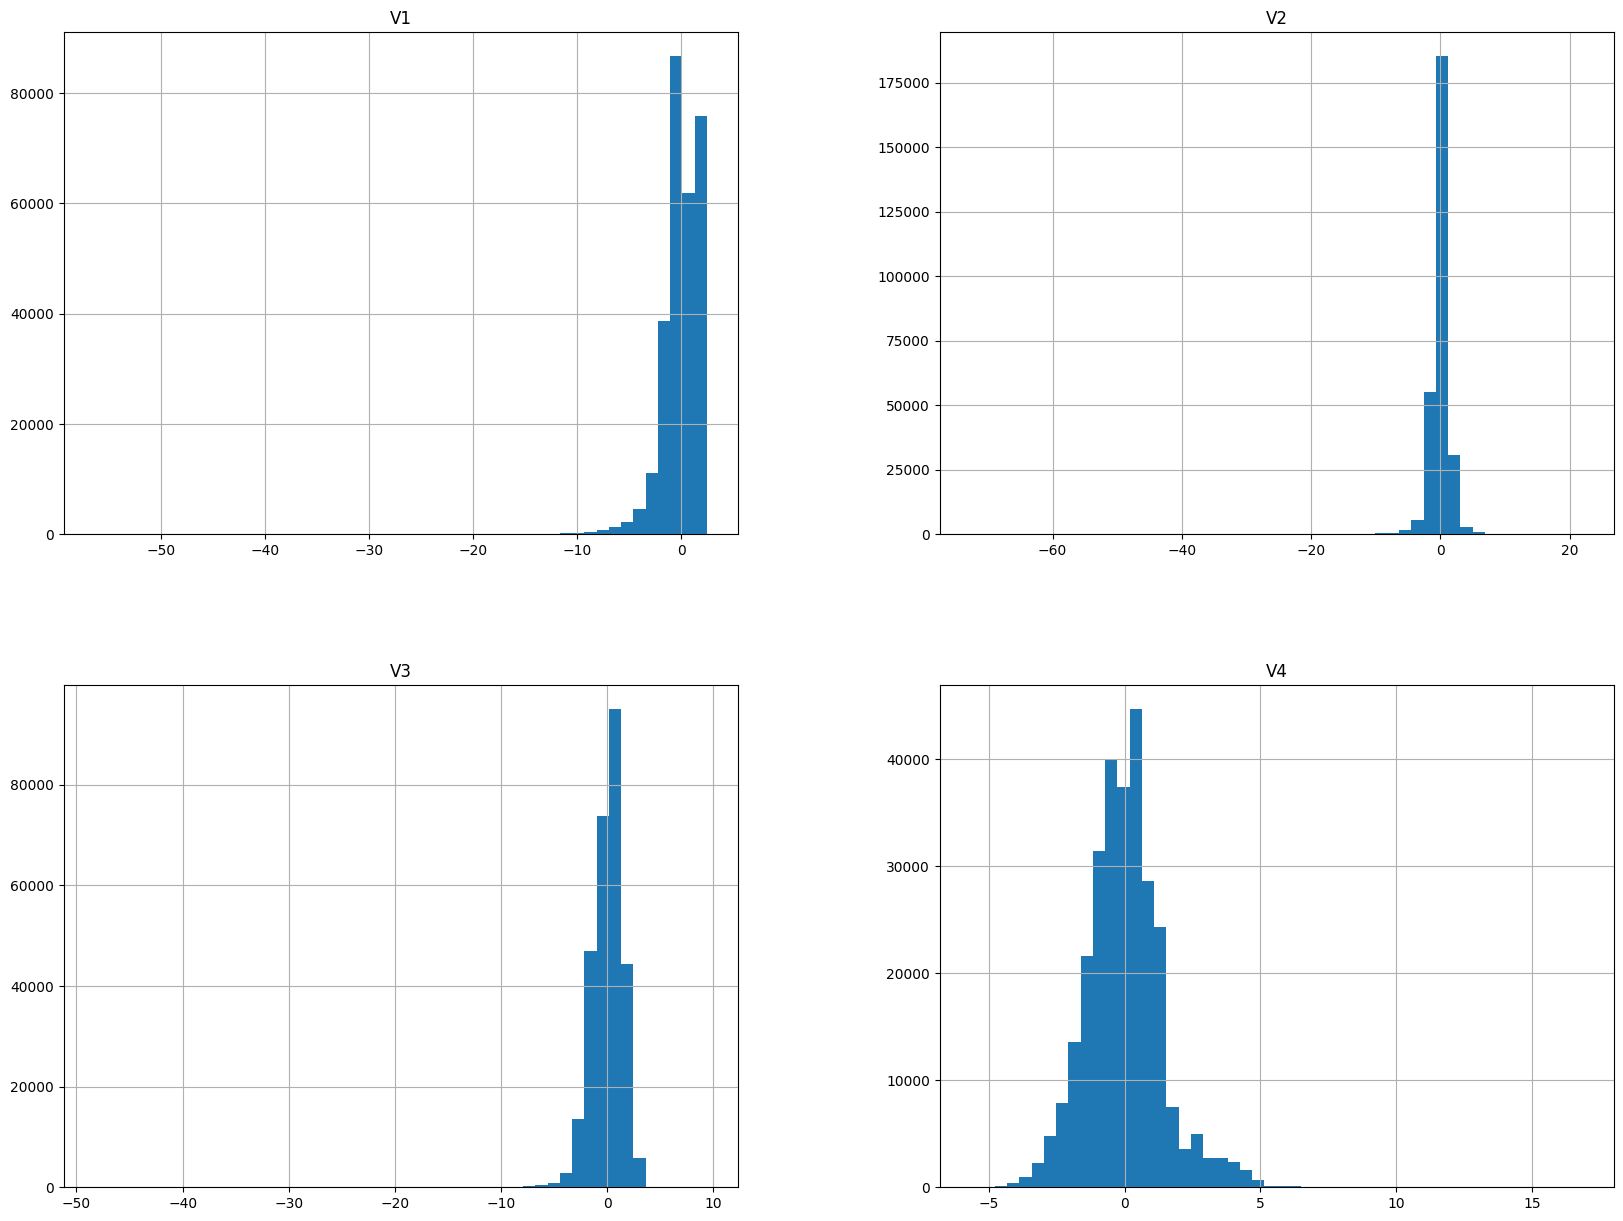

In [6]:
# Plot histograms of some features
df.iloc[:, 1:5].hist(bins=50, figsize=(20,15))
plt.show()

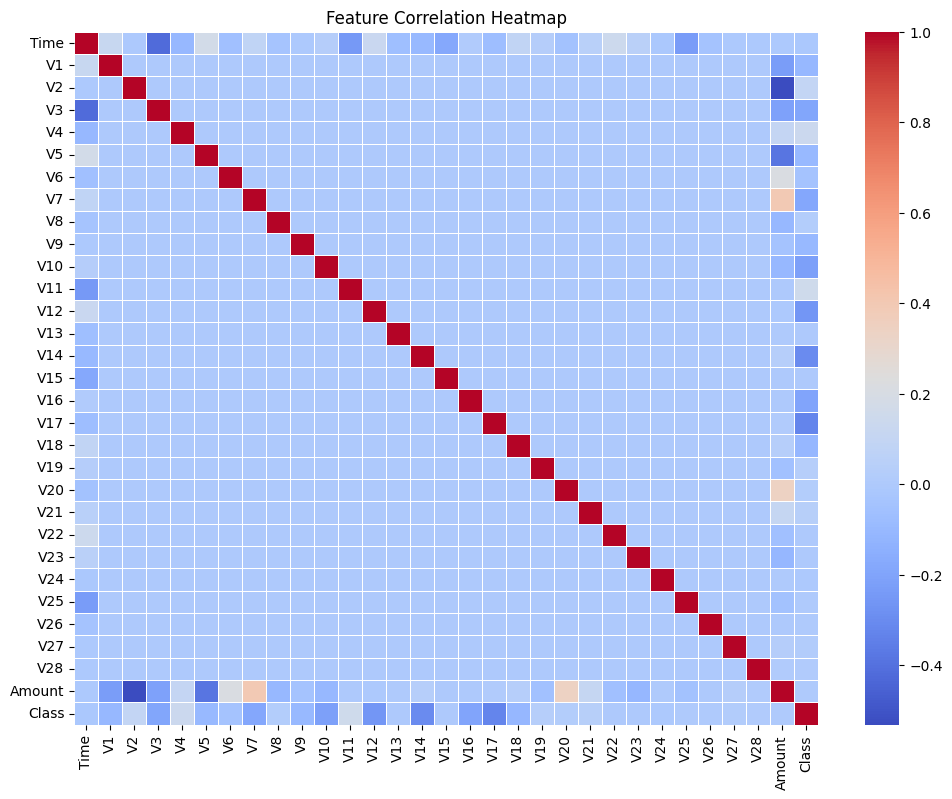

In [7]:
# Plot correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
from imblearn.over_sampling import RandomOverSampler

# Randomly oversample the minority class (fraud)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

# Check new class distribution
print(pd.Series(y_resampled).value_counts())

Class
0    199008
1    199008
Name: count, dtype: int64


In [9]:
from imblearn.under_sampling import RandomUnderSampler

# Randomly undersample the majority class (non-fraud)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

# Check new class distribution
print(pd.Series(y_resampled).value_counts())

Class
0    356
1    356
Name: count, dtype: int64


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Instantiate the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Training model on the resampled data
log_reg.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
 [[81959  3348]
 [    9   127]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443


ROC-AUC Score: 0.9799


In [11]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_resampled, y_resampled, cv=5, scoring='roc_auc')

# Display mean cross-validation score
print(f"Mean AUC-ROC from cross-validation: {cv_scores.mean():.4f}")

Mean AUC-ROC from cross-validation: 0.9746


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter space to search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1)

# Fit on the training data
random_search.fit(X_resampled, y_resampled)

# Print parameters and AUC score
print("Best Parameters:", random_search.best_params_)
print("Best AUC-ROC Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': False}
Best AUC-ROC Score: 0.9787613948869677


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the steps in pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train pipeline on resampled data
pipeline.fit(X_resampled, y_resampled)

# Make prediction
y_pred = pipeline.predict(X_test_scaled)

# Evaluate model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test_scaled)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
 [[83128  2179]
 [    9   127]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.06      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443


ROC-AUC Score: 0.9797


In [14]:
import joblib

# Save trained model
joblib.dump(pipeline, 'fraud_detection_model.pkl')

# Load model for predictions
loaded_model = joblib.load('fraud_detection_model.pkl')
y_loaded_pred = loaded_model.predict(X_test_scaled)

In [26]:
import numpy as np
from sklearn.metrics import classification_report
import joblib

# Load trained model
model = joblib.load('fraud_detection_model.pkl')

num_samples = 100 # test samples
num_features = 30 # num of features

# Generate random data
random_data = np.random.uniform(low=-10, high=10, size=(num_samples, num_features))

# Use trained pipeline
random_predictions = model.predict(random_data)

# predictions
print("Predictions on random data:\n", random_predictions)

# Calculate predicted as fraud(1) or non-fraud(0)
fraud_predictions = np.sum(random_predictions)
non_fraud_predictions = num_samples - fraud_predictions

print(f"Out of {num_samples} random transactions, {fraud_predictions} were predicted as fraud, and {non_fraud_predictions} as non-fraud.")

Predictions on random data:
 [1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1]
Out of 100 random transactions, 76 were predicted as fraud, and 24 as non-fraud.
